In [1]:
import numpy as np
from run_mzn import run_mzn
from plan_to_dzn import PlanToDZN
from mzn_arr_to_schedule import arr_to_schedule
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
p2d = PlanToDZN(2, False)
p2d.create_from_file('ext_plan.plan')

In [3]:
[start_times, durations, action_driver, action_train] = run_mzn(300, 'chuffed')

{"type": "statistics", "statistics": {"paths": 0, "flatBoolVars": 56, "flatIntVars": 24, "flatBoolConstraints": 39, "flatIntConstraints": 79, "evaluatedReifiedConstraints": 56, "method": "minimize", "flatTime": 0.100221}}
{"type": "statistics", "statistics": {"nSolutions": 49}}


In [4]:
action_driver

[1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1]

In [5]:
train_schedule = np.zeros((np.max(action_train),np.max(start_times)+np.max(durations)))
for i in range(len(start_times)):
    train_id = action_train[i]-1
    train_schedule[train_id,start_times[i]:start_times[i]+durations[i]] = i

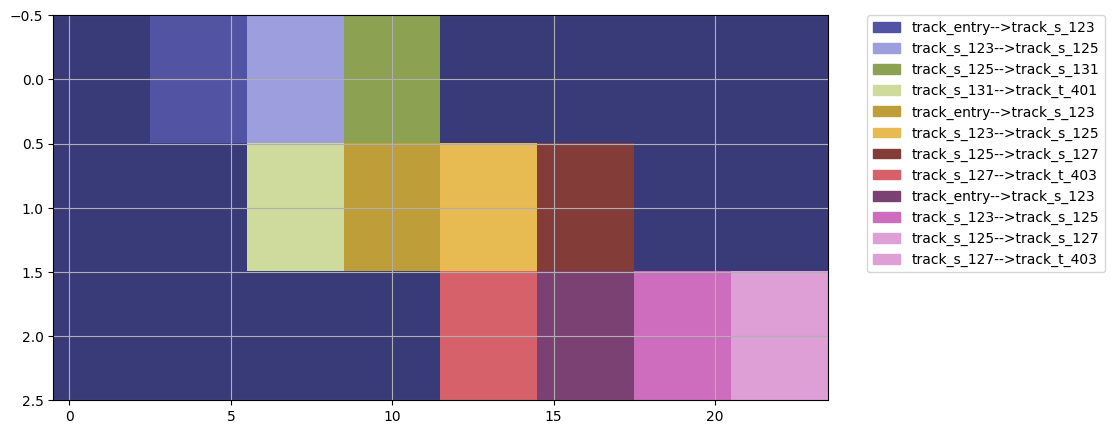

In [6]:
plt.figure(figsize=(10,5))
im = plt.imshow(train_schedule, aspect='auto', cmap='tab20b')
# get the colors of the values, according to the 
# colormap used by imshow
labels = [f'{m.origin.name}-->{m.destination.name}' for m in p2d.movements]
colors = [ im.cmap(im.norm(i)) for i in range(len(labels)+1)]
# create a patch (proxy artist) for every color 
patches = [ mpatches.Patch(color=colors[i+1], label=labels[i] ) for i in range(len(labels)) ]
# put those patched as legend-handles into the legend

plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )

plt.grid(True)

In [7]:
plt.figure(figsize=(20,5))
plt.imshow(driver_schedule, aspect=5)
plt.colorbar()
plt.grid(True)

NameError: name 'driver_schedule' is not defined

<Figure size 2000x500 with 0 Axes>